# **Introduction to Machine Learning (lab 2)**

### *(Due on the 30th of October)*

The goal of this task is to experiment with different ML algorithms and analyze empirically the trade-off between overfitting and generalization.

We will continue using the Colab environment and [scikit-learn](https://scikit-learn.org/stable/user_guide.html).

Pick a classification dataset from the LIBSVM repository of datasets:
http://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/


In [1]:
# Example of downloading a dataset
!wget -t inf https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary/a1a

--2023-11-30 11:46:25--  https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary/a1a
Resolving www.csie.ntu.edu.tw (www.csie.ntu.edu.tw)... 140.112.30.26
Connecting to www.csie.ntu.edu.tw (www.csie.ntu.edu.tw)|140.112.30.26|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 114818 (112K)
Saving to: ‘a1a’

a1a                 100%[===================>] 112.13K   209KB/s    in 0.5s    

2023-11-30 11:46:27 (209 KB/s) - ‘a1a’ saved [114818/114818]



In [2]:
# Example of loading a dataset
from sklearn.datasets import load_svmlight_file
X_train, y_train = load_svmlight_file("a1a")
print(X_train)

  (0, 2)	1.0
  (0, 10)	1.0
  (0, 13)	1.0
  (0, 18)	1.0
  (0, 38)	1.0
  (0, 41)	1.0
  (0, 54)	1.0
  (0, 63)	1.0
  (0, 66)	1.0
  (0, 72)	1.0
  (0, 74)	1.0
  (0, 75)	1.0
  (0, 79)	1.0
  (0, 82)	1.0
  (1, 2)	1.0
  (1, 5)	1.0
  (1, 16)	1.0
  (1, 26)	1.0
  (1, 34)	1.0
  (1, 39)	1.0
  (1, 56)	1.0
  (1, 62)	1.0
  (1, 68)	1.0
  (1, 72)	1.0
  (1, 73)	1.0
  :	:
  (1603, 21)	1.0
  (1603, 35)	1.0
  (1603, 41)	1.0
  (1603, 47)	1.0
  (1603, 64)	1.0
  (1603, 70)	1.0
  (1603, 72)	1.0
  (1603, 73)	1.0
  (1603, 75)	1.0
  (1603, 79)	1.0
  (1603, 82)	1.0
  (1604, 3)	1.0
  (1604, 9)	1.0
  (1604, 14)	1.0
  (1604, 23)	1.0
  (1604, 37)	1.0
  (1604, 40)	1.0
  (1604, 51)	1.0
  (1604, 65)	1.0
  (1604, 66)	1.0
  (1604, 71)	1.0
  (1604, 73)	1.0
  (1604, 75)	1.0
  (1604, 81)	1.0
  (1604, 82)	1.0


## **1. Decision Trees**

**1.1.** Partition the dataset into a training and a testing set. Run a decision tree learning algorithm using the training set. Test the decision tree on the testing dataset and report the total classification error (i.e. 0/1 error).

[*Decision Trees in [scikit-learn](https://scikit-learn.org/stable/modules/tree.html)*]

In [3]:
X, y = load_svmlight_file("a1a")

from sklearn.model_selection import train_test_split
# Split the dataset into a training set and a testing set (e.g., 70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Initialize the decision tree classifier
clf = DecisionTreeClassifier(max_depth=3, random_state=20)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Calculate the classification error (0/1 error)
classification_error = 1 - accuracy_score(y_test, y_pred)
print(f"Classification Error: {classification_error}")

Classification Error: 0.19502074688796678


**1.2.** Repeat the experiment with a different partition of the data. Plot the resulting trees.

[*Advice: it can be convenient to set a maximum depth for the tree. You can find different ways to plot the resulting trees [here](https://mljar.com/blog/visualize-decision-tree/).*]



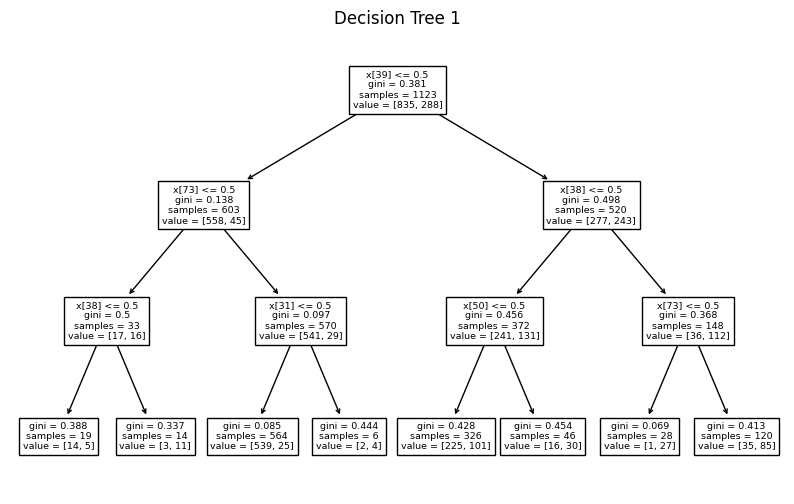

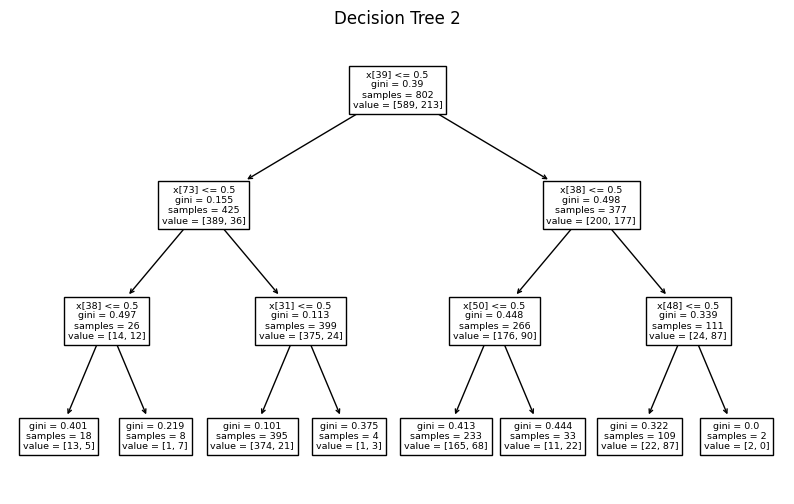

In [4]:
# Create a decision tree classifier with a maximum depth (e.g., max_depth=3)
clf2 = DecisionTreeClassifier(max_depth=3, random_state=20)

# Split the dataset into a training and testing set with a different random seed
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y, test_size=0.5, random_state=20)

# Train the classifier on the new training data
clf2.fit(X2_train, y2_train)

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
# Visualize the decision trees
plt.figure(figsize=(10, 6))
plot_tree(clf)
plt.title("Decision Tree 1")
plt.show()

plt.figure(figsize=(10, 6))
plot_tree(clf2)
plt.title("Decision Tree 2")
plt.show()


**1.3** Are the previous trees very similar, or very different? Explain why.

There is some level of similarity between the two. The random seed was kept the same but the testing set in the first example is 30%, smaller then 50% in the second example. Even though larger traing set could mean more accuracy for the first example, both trees are trained on examples from the same data set. Therefore similarities can be observed despite the diferent partition of the data. for example x[39] is the root for both trees, and going down in most of the cases the trees splits on the same features.

## **2. Support Vector Machines**

**2.1** Run SVM to train a classifier, using radial basis as kernel function. Apply cross-validation to evaluate different combinations of values of the model hyper-parameters (box constraint $C$ and kernel parameter $\gamma$).

[*Support Vector Machines in [scikit-learn](https://scikit-learn.org/stable/modules/svm.html)*]

In [5]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'gamma': [0.001, 0.01, 0.1, 1, 10]
}

svm_classifier = SVC(kernel='rbf')

grid_search = GridSearchCV(estimator=svm_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X, y)

best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best Cross-Validated Accuracy:", best_accuracy)

Best Hyperparameters: {'C': 1, 'gamma': 0.1}
Best Cross-Validated Accuracy: 0.8286604361370717


**2.2.** How sensitive is the cross-validation error to changes in $C$ and $\gamma$? Choose the combination of $C$ and $\gamma$ that minimizes the cross-validation error, train the SVM on the entire dataset and report the total classification error.

[*Advice: consider a binary class problem. Use a logaritmic ranges for $\gamma$ and $C$. You can use [imshow](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html) to display data a 2D plot.*]

Best Hyperparameters: C= 1.0 , gamma= 0.1
Total Classification Error: 0.11339563862928348


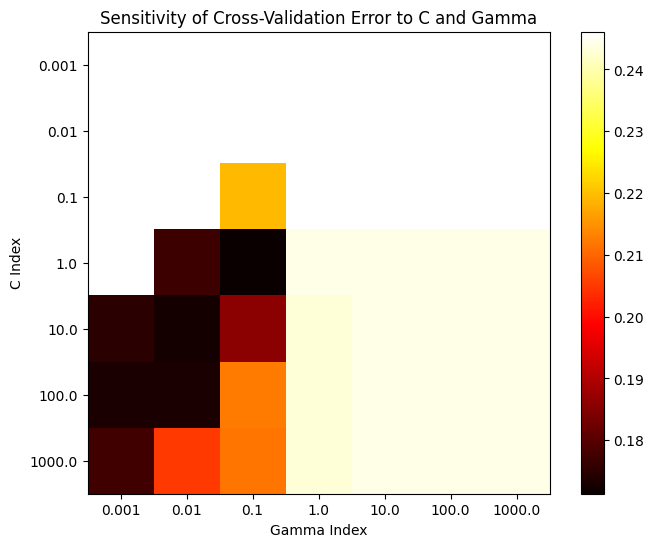

In [6]:
import numpy as np

# Generate a grid of C and gamma values from 0.001 to 1000 on a logarithmic scale
C_values = np.logspace(-3, 3, 7)
gamma_values = np.logspace(-3, 3, 7)
param_grid = {
    'C': C_values,
    'gamma': gamma_values
  }


# Create a SVM classifier with RBF kernel
svm_classifier = SVC(kernel='rbf')

# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(estimator=svm_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(X, y)
best_C = grid_search.best_params_['C']
best_gamma = grid_search.best_params_['gamma']

best_svm_classifier = SVC(kernel='rbf', C=best_C, gamma=best_gamma)
best_svm_classifier.fit(X, y)

y_pred = best_svm_classifier.predict(X)
total_classification_error = 1 - accuracy_score(y, y_pred)

print("Best Hyperparameters: C=", best_C, ", gamma=" ,best_gamma)
print("Total Classification Error:", total_classification_error)



# Get the cross-validation error for each combination of C and gamma
cross_val_errors = 1 - grid_search.cv_results_['mean_test_score'].reshape(len(C_values), len(gamma_values))


# Create a heatmap using imshow
plt.figure(figsize=(8, 6))
plt.imshow(cross_val_errors, cmap=plt.cm.hot)
plt.colorbar()
plt.title("Sensitivity of Cross-Validation Error to C and Gamma")
plt.xlabel("Gamma Index")
plt.ylabel("C Index")
plt.xticks([0,1,2,3,4,5,6],gamma_values)
plt.yticks([0,1,2,3,4,5,6],C_values)

plt.show()
